In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
combined = pd.read_csv('../Data/combined.csv')
combined['Precip'] = combined['Precip'].fillna(0)

,Unnamed: 0,CRSDep,CRSDepRound,ActDep,DepDelay,Origin,Dest,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temp,DewPoint,RelHumidity,Precip,WindDir,WindSpeed,AirPressure
0,0,2008-01-08 16:00:00,2008-01-08 16:00:00,2008-01-08 17:11:00,71,ORD,EWR,0.0,0.0,2.0,0.0,44.0,12.0,11.1,94.0,0.0,220.0,7.6,NaN
1,1,2008-01-25 17:42:00,2008-01-25 18:00:00,2008-01-25 18:13:00,31,ORD,CLE,0.0,0.0,5.0,0.0,31.0,-10.0,-18.2,51.0,0.0,220.0,14.8,1031.9
2,2,2008-01-10 16:00:00,2008-01-10 16:00:00,2008-01-10 16:01:00,1,ORD,EWR,NaN,NaN,NaN,NaN,NaN,3.3,-0.5,76.0,0.0,90.0,18.4,1010.1
3,3,2008-01-04 06:50:00,2008-01-04 07:00:00,2008-01-04 06:58:00,8,ORD,EWR,NaN,NaN,NaN,NaN,NaN,-5.0,-10.0,68.0,0.0,210.0,24.1,1028.0
4,4,2008-01-28 12:40:00,2008-01-28 13:00:00,2008-01-28 13:58:00,78,ORD,EWR,0.0,0.0,91.0,0.0,0.0,5.0,-3.3,55.0,0.0,190.0,25.9,1011.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179544,179544,2008-12-12 09:25:00,2008-12-12 09:00:00,2008-12-12 09:37:00,12,ORD,ATL,NaN,NaN,NaN,NaN,NaN,-8.3,-12.8,70.0,0.0,310.0,14.8,1018.2
179545,179545,2008-12-12 10:40:00,2008-12-12 11:00:00,2008-12-12 10:44:00,4,ORD,ATL,NaN,NaN,NaN,NaN,NaN,-10.0,-15.0,67.0,0.0,350.0,24.1,1019.3
179546,179546,2008-12-12 11:50:00,2008-12-12 12:00:00,2008-12-12 12:10:00,20,ORD,ATL,NaN,NaN,NaN,NaN,NaN,-10.6,-16.1,64.0,0.0,330.0,20.5,1020.1
179547,179547,2008-12-12 14:45:00,2008-12-12 15:00:00,2008-12-12 15:02:00,17,ORD,ATL,NaN,NaN,NaN,NaN,NaN,-11.7,-17.1,64.0,0.0,320.0,22.3,1021.8


In [26]:
# bin all the data by delays 
delay_30 = combined.loc[combined['DepDelay'] <= 30]
delay_60 = combined.loc[(combined['DepDelay'] > 30) & (combined['DepDelay'] <= 60)]
delay_90 = combined.loc[(combined['DepDelay'] > 60) & (combined['DepDelay'] <= 90)]
delay_120 = combined.loc[(combined['DepDelay'] > 90) & (combined['DepDelay'] <= 120)]
delay_150 = combined.loc[(combined['DepDelay'] > 120) & (combined['DepDelay'] <= 150)]
delay_180 = combined.loc[(combined['DepDelay'] > 150) & (combined['DepDelay'] <= 180)]
delay_181 = combined.loc[combined['DepDelay'] > 180]

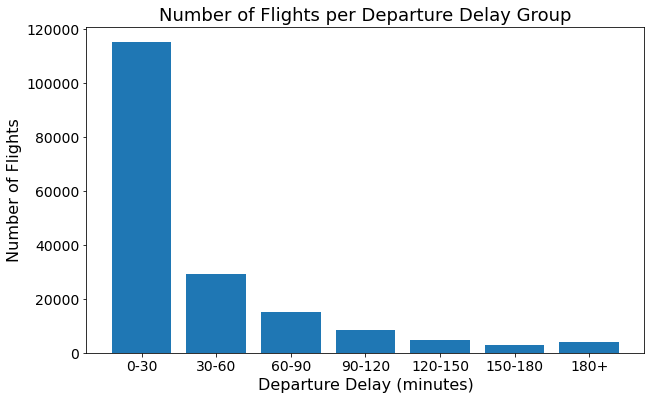

In [36]:
x = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180+']
bars = [len(delay_30),  len(delay_60), 
        len(delay_90),  len(delay_120), 
        len(delay_150), len(delay_180),
        len(delay_181)]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.xlabel('Departure Delay (minutes)', fontsize=16)
plt.ylabel('Number of Flights', fontsize=16)
plt.title('Number of Flights per Departure Delay Group', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('delay_bins.png')

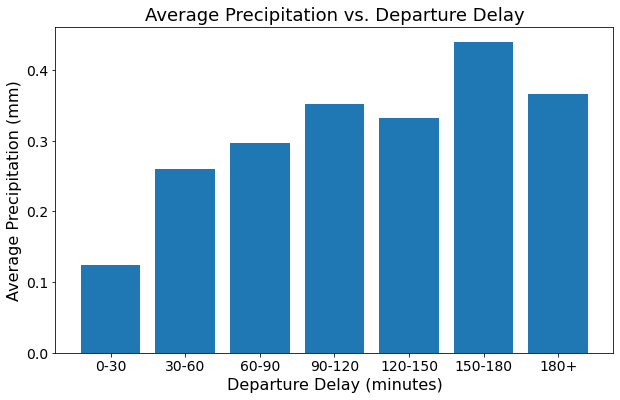

In [27]:
# delay vs precip
x = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180+']
bars = [ np.mean(delay_30['Precip']),  np.mean(delay_60['Precip']), 
         np.mean(delay_90['Precip']),  np.mean(delay_120['Precip']), 
         np.mean(delay_150['Precip']), np.mean(delay_180['Precip']),
         np.mean(delay_181['Precip'])]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.xlabel('Departure Delay (minutes)', fontsize=16)
plt.ylabel('Average Precipitation (mm)', fontsize=16)
plt.title('Average Precipitation vs. Departure Delay', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('delay_bin_vs_precip.png')

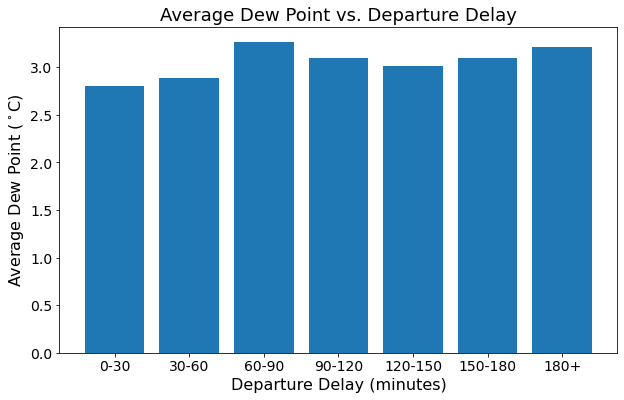

In [29]:
# delay vs dew point
x = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180+']
bars = [np.mean(delay_30['DewPoint']),  np.mean(delay_60['DewPoint']), 
        np.mean(delay_90['DewPoint']),  np.mean(delay_120['DewPoint']), 
        np.mean(delay_150['DewPoint']), np.mean(delay_180['DewPoint']),
        np.mean(delay_181['DewPoint'])]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.xlabel('Departure Delay (minutes)', fontsize=16)
plt.ylabel('Average Dew Point ($^\circ$C)', fontsize=16)
plt.title('Average Dew Point vs. Departure Delay', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('delay_bin_vs_dew.png')

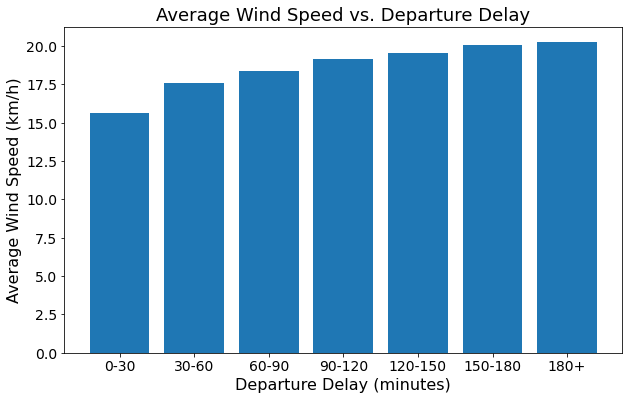

In [27]:
# delay vs wind speed
x = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180+']
bars = [ np.nanmean(delay_30['WindSpeed']),  np.nanmean(delay_60['WindSpeed']),  np.nanmean(delay_90['WindSpeed']), 
        np.nanmean(delay_120['WindSpeed']), np.nanmean(delay_150['WindSpeed']), np.nanmean(delay_180['WindSpeed']),
        np.nanmean(delay_181['WindSpeed'])]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.xlabel('Departure Delay (minutes)', fontsize=16)
plt.ylabel('Average Wind Speed (km/h)', fontsize=16)
plt.title('Average Wind Speed vs. Departure Delay', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('delay_bin_vs_wind.png')

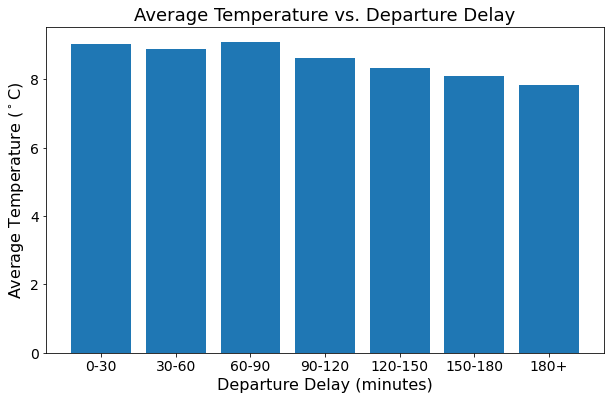

In [28]:
# delay vs temp
x = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180+']
bars = [np.mean(delay_30['Temp']), np.mean(delay_60['Temp']), np.mean(delay_90['Temp']), 
        np.mean(delay_120['Temp']), np.mean(delay_150['Temp']), np.mean(delay_180['Temp']),
        np.mean(delay_181['Temp'])]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.xlabel('Departure Delay (minutes)', fontsize=16)
plt.ylabel('Average Temperature ($^\circ$C)', fontsize=16)
plt.title('Average Temperature vs. Departure Delay', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('delay_bin_vs_temp.png')

In [43]:
# bin all the data by precipitation
precip_1 =   combined.loc[(combined['Precip'] <= 0.2)]
precip_2 =   combined.loc[(combined['Precip'] > 0.2) & (combined['Precip'] <= 0.4)]
precip_3 =   combined.loc[(combined['Precip'] > 0.4) & (combined['Precip'] <= 0.6)]
precip_4 =  combined.loc[(combined['Precip'] > 0.6) & (combined['Precip'] <= 0.8)]
precip_5 = combined.loc[(combined['Precip'] > 0.8) & (combined['Precip'] <= 1)]
precip_6 = combined.loc[(combined['Precip'] > 1)]

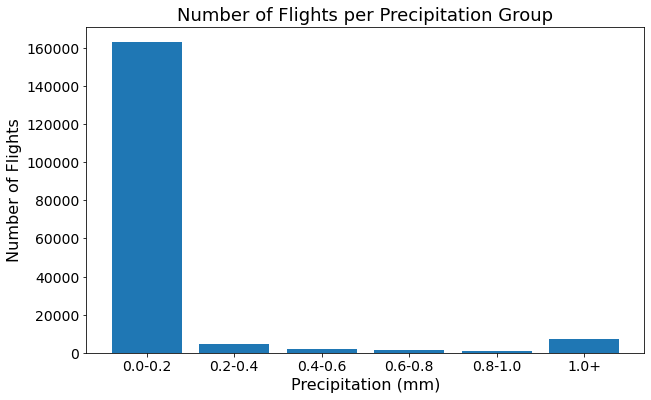

In [39]:
x = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '1.0+']
bars = [ len(precip_1),  len(precip_2), 
         len(precip_3),  len(precip_4), 
         len(precip_5),  len(precip_6)]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.xlabel('Precipitation (mm)', fontsize=16)
plt.ylabel('Number of Flights', fontsize=16)
plt.title('Number of Flights per Precipitation Group', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('precip_bins.png')

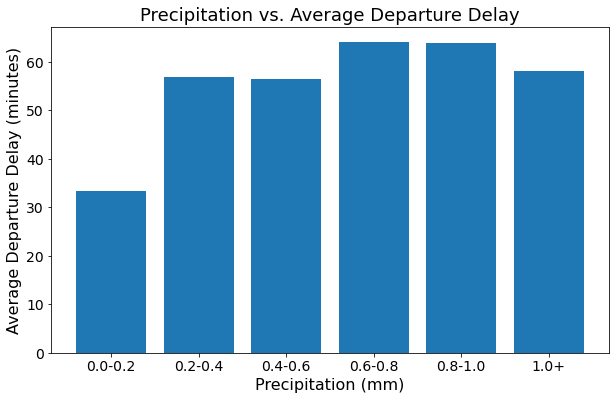

In [31]:
# precip vs delay 
x = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '1.0+']
#x = ['0.0-0.1', ' ', '0.2-0.3', ' ', '0.4-0.5', ' ', ' ', '0.7-0.8', ' ', '0.9-1.0', '1.0+']
bars = [ np.mean(precip_1['DepDelay']),  np.mean(precip_2['DepDelay']), 
         np.mean(precip_3['DepDelay']),  np.mean(precip_4['DepDelay']), 
         np.mean(precip_5['DepDelay']),  np.mean(precip_6['DepDelay'])]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.ylabel('Average Departure Delay (minutes)', fontsize=16)
plt.xlabel('Precipitation (mm)', fontsize=16)
plt.title('Precipitation vs. Average Departure Delay', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('precip_bin_vs_delay.png')

In [42]:
# bin all the data by wind speed
wind_1 = combined.loc[(combined['WindSpeed'] <= 10)]
wind_2 = combined.loc[(combined['WindSpeed'] > 10) & (combined['Precip'] <= 20)]
wind_3 = combined.loc[(combined['WindSpeed'] > 20) & (combined['Precip'] <= 30)]
wind_4 = combined.loc[(combined['WindSpeed'] > 30) & (combined['Precip'] <= 40)]
wind_5 = combined.loc[(combined['WindSpeed'] > 40) & (combined['Precip'] <= 50)]
wind_6 = combined.loc[(combined['WindSpeed'] > 50)]

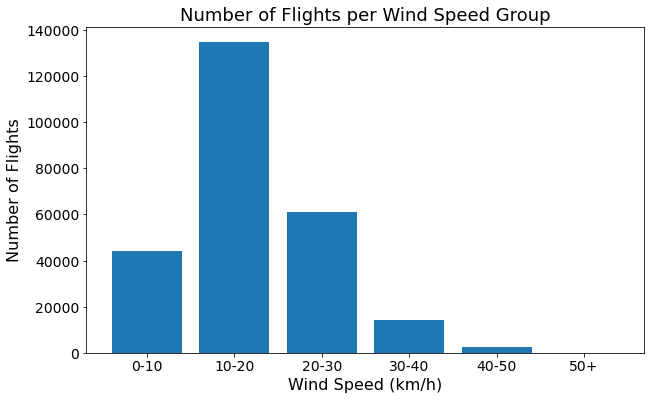

In [44]:
x = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
bars = [ len(wind_1),  len(wind_2), 
         len(wind_3),  len(wind_4), 
         len(wind_5),  len(wind_6)]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.xlabel('Wind Speed (km/h)', fontsize=16)
plt.ylabel('Number of Flights', fontsize=16)
plt.title('Number of Flights per Wind Speed Group', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('wind_bins.png')

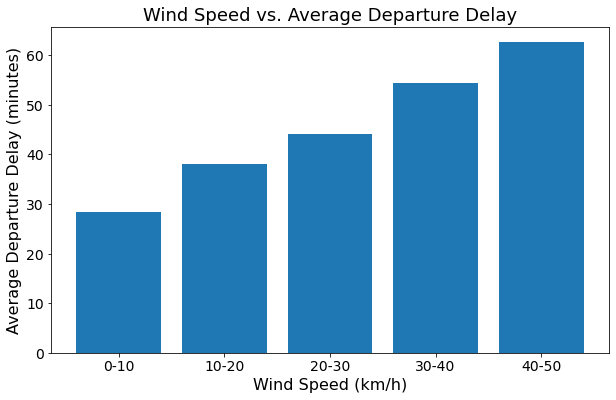

In [45]:
# precip vs delay 
x = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
bars = [ np.mean(wind_1['DepDelay']),  np.mean(wind_2['DepDelay']), 
         np.mean(wind_3['DepDelay']),  np.mean(wind_4['DepDelay']), 
         np.mean(wind_5['DepDelay']),  np.mean(wind_6['DepDelay'])]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.ylabel('Average Departure Delay (minutes)', fontsize=16)
plt.xlabel('Wind Speed (km/h)', fontsize=16)
plt.title('Wind Speed vs. Average Departure Delay', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('wind_bin_vs_delay.png')